# Titanic: Machine Learning from Disaster -3

目标：利用给定数据，预测是否 Survived

参考：https://www.kaggle.com/omarelgabry/a-journey-through-titanic

**主要思路是：（get_dummies）删除 Survived 概率低的项**

## 大体流程
- 加载数据
- 删除不需要的项：PassengerId(训练数据中的)，Name，Ticket
- 处理缺失数据：Embarked，Fare，Age，Cabin（缺失太多直接删除）
- 特征工程：Family，Person，Pclass
- 预测，使用模型
    - LogisticRegression
    - SVC
    - RandomForestClassifier
    - KNeighborsClassifier
    - GaussianNB
    - GradientBoostingClassifier
- 提交后得分
    - LogisticRegression：0.76077
    - SVC：0.61722
    - RandomForestClassifier：0.73206
    - KNeighborsClassifier：0.62201
    - GaussianNB：0.73206
    - GradientBoostingClassifier：0.77033

# 加载数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
titanic_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 打印基本信息
titanic_df.info()
print '-'*40
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# 删除不需要的项

在这里不打算使用'PassengerId'（titanic_df中的）,'Name','Ticket'这三列来进行预测，所以提前 drop 掉。

In [4]:
titanic_df=titanic_df.drop(['PassengerId','Name','Ticket'],axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df=test_df.drop(['Name','Ticket'],axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


# 处理缺失数据

首先查看哪些列有缺失数据，然后逐一处理。

In [7]:
# 查看哪些数据缺失
def isnan(d):
    return sum(d.isnull())
print titanic_df.apply(isnan)
print '-'*40
test_df.apply(isnan)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
----------------------------------------


PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Embarked

填充后 get_dummies，删除 Survived 概率低的列。

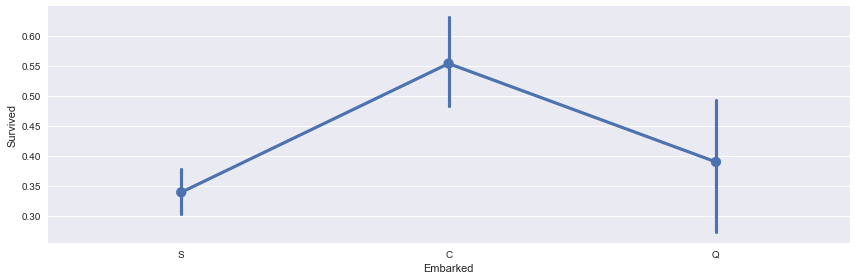

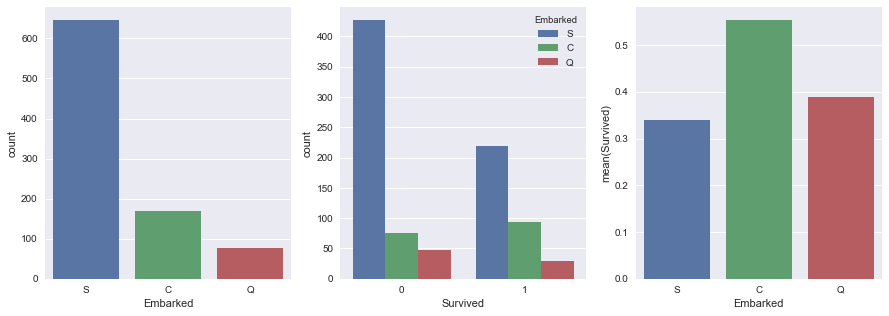

In [8]:
# 只有 titanic_df 缺失，使用 S 填充
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')
sns.factorplot('Embarked','Survived',data=titanic_df,size=4,aspect=3)

fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked',data=titanic_df,ax=axis1)
sns.countplot(x='Survived',hue='Embarked',data=titanic_df,ax=axis2)
embark_perc=titanic_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()
sns.barplot('Embarked','Survived',data=embark_perc,order=['S','C','Q'],ax=axis3)

In [9]:
embark_dummies_titanic=pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
embark_dummies_titanic.drop(['S'],axis=1,inplace=True)
embark_dummies_titanic.head()

,C,Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [11]:
embark_dummies_test=pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'],axis=1,inplace=True)
embark_dummies_test.head()

,C,Q
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [12]:
titanic_df=titanic_df.join(embark_dummies_titanic)
test_df=test_df.join(embark_dummies_test)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,0


In [13]:
titanic_df.drop(['Embarked'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,0,3,male,22.0,1,0,7.2500,NaN,0,0
1,1,1,female,38.0,1,0,71.2833,C85,1,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0
3,1,1,female,35.0,1,0,53.1000,C123,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,0,0


In [14]:
test_df.drop(['Embarked'],axis=1,inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,892,3,male,34.5,0,0,7.8292,NaN,0,1
1,893,3,female,47.0,1,0,7.0000,NaN,0,0
2,894,2,male,62.0,0,0,9.6875,NaN,0,1
3,895,3,male,27.0,0,0,8.6625,NaN,0,0
4,896,3,female,22.0,1,1,12.2875,NaN,0,0


## Fare

使用众数填充后转为整数

In [15]:
# 只用 test_df 的 Fare 需要填充，在这里使用众数填充
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
isnan(test_df['Fare'])

0

In [16]:
# 将 Fare 转成整数
titanic_df['Fare']=titanic_df['Fare'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q
0,0,3,male,22.0,1,0,7,NaN,0,0
1,1,1,female,38.0,1,0,71,C85,1,0
2,1,3,female,26.0,0,0,7,NaN,0,0
3,1,1,female,35.0,1,0,53,C123,0,0
4,0,3,male,35.0,0,0,8,NaN,0,0


In [17]:
# Survived 和 not_Survived 的 average_fare、std_fare
fare_not_survived=titanic_df['Fare'][titanic_df['Survived']==0]
fare_survived=titanic_df['Fare'][titanic_df['Survived']==1]

average_fare=pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare=pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

average_fare

,0
0,21.690346
1,47.991228


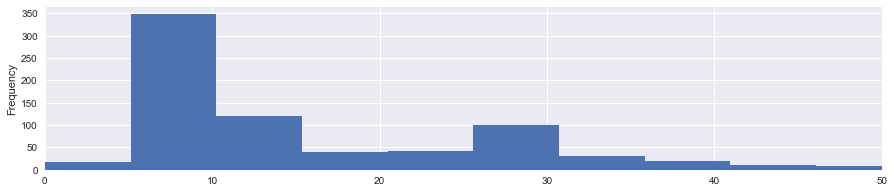

In [18]:
titanic_df['Fare'].plot(kind='hist',figsize=(15,3),bins=100,xlim=(0,50))

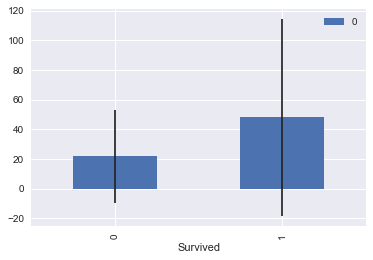

In [19]:
average_fare.index.names=std_fare.index.names=['Survived']
average_fare.plot(yerr=std_fare,kind='bar')

## Age

生成随机数填充缺失的 Age，范围 [mean - std, mean + std]。

然后将 Age 转为整数。

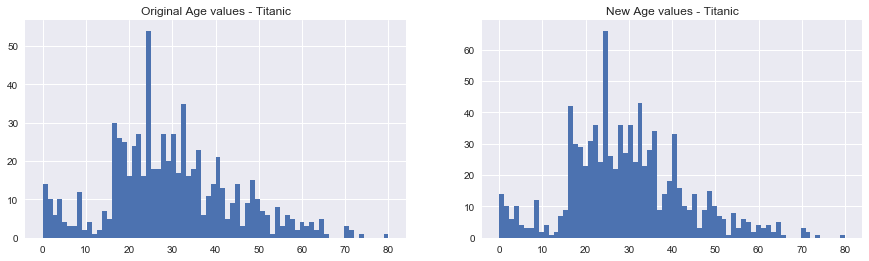

In [20]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

average_age_titanic=titanic_df['Age'].mean()
std_age_titanic=titanic_df['Age'].std()
count_nan_age_titanoc=isnan(titanic_df['Age'])

average_age_test=test_df['Age'].mean()
std_age_test=test_df['Age'].std()
count_nan_age_test=isnan(test_df['Age'])

# 生成随机数填充缺失的 Age，范围 [mean - std, mean + std]
rand_1=np.random.randint(average_age_titanic - std_age_titanic,average_age_titanic+std_age_titanic,count_nan_age_titanoc)
rand_2=np.random.randint(average_age_test - std_age_test,average_age_test+std_age_test,count_nan_age_test)

titanic_df['Age'].dropna().astype(int).hist(bins=70,ax=axis1)

titanic_df.loc[titanic_df['Age'].isnull(),'Age']=rand_1
test_df.loc[test_df['Age'].isnull(),'Age']=rand_2

# 将 Age 转为整数
titanic_df['Age']=titanic_df['Age'].astype(int)
test_df['Age']=test_df['Age'].astype(int)

titanic_df['Age'].hist(bins=70,ax=axis2)

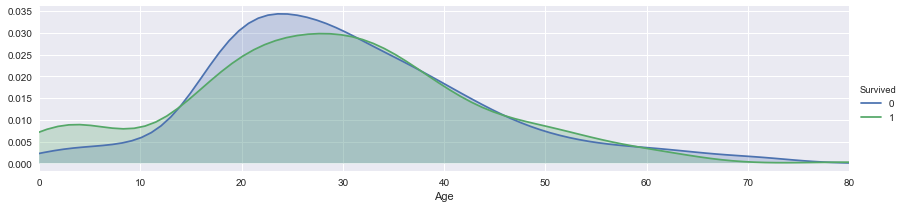

In [21]:
facet=sns.FacetGrid(titanic_df,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_df['Age'].max()))
facet.add_legend()
plt.show()

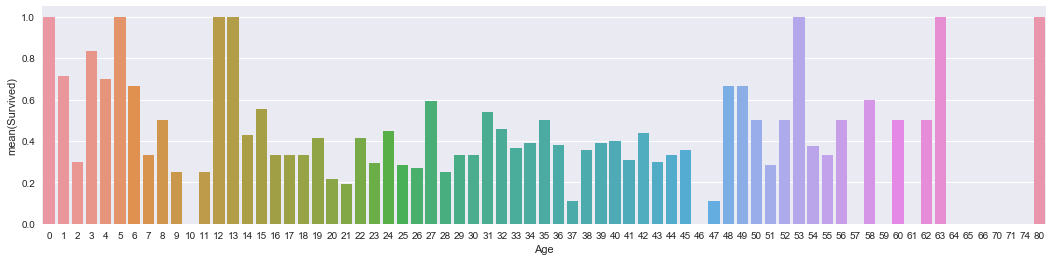

In [22]:
# 按年龄划分的平均 Survived
average_age=titanic_df[['Age','Survived']].groupby(['Age'],as_index=False).mean()
fig,axis1=plt.subplots(1,1,figsize=(18,4))
sns.barplot('Age','Survived',data=average_age)
plt.show()

## Cabin

缺失值太多，直接删除

In [23]:
titanic_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22,1,0,7,0,0
1,1,1,female,38,1,0,71,1,0
2,1,3,female,26,0,0,7,0,0
3,1,1,female,35,1,0,53,0,0
4,0,3,male,35,0,0,8,0,0


# 特征工程

## Family

通过 Parch 和 SibSp 来计算

In [24]:
titanic_df['Family']=titanic_df['Parch']+titanic_df['SibSp']
titanic_df['Family'].loc[titanic_df['Family']==0]=0
titanic_df['Family'].loc[titanic_df['Family']>0]=1

test_df['Family']=test_df['Parch']+test_df['SibSp']
test_df['Family'].loc[test_df['Family']==0]=0
test_df['Family'].loc[test_df['Family']>0]=1

# 删除 Parch 和 SibSp
titanic_df.drop(['Parch','SibSp'],axis=1,inplace=True)
test_df.drop(['Parch','SibSp'],axis=1,inplace=True)

titanic_df.head()

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Sex,Age,Fare,C,Q,Family
0,0,3,male,22,7,0,0,1
1,1,1,female,38,71,1,0,1
2,1,3,female,26,7,0,0,0
3,1,1,female,35,53,0,0,1
4,0,3,male,35,8,0,0,0


[<matplotlib.text.Text at 0x11507fd10>, <matplotlib.text.Text at 0x115089190>]

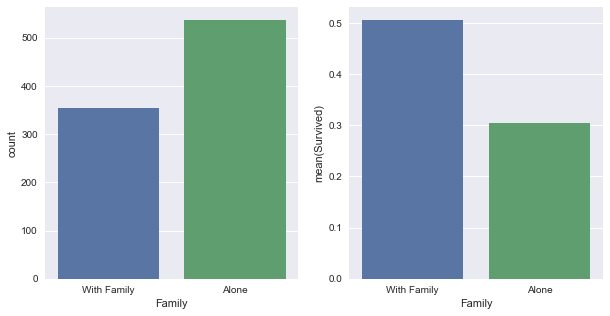

In [25]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))

sns.countplot('Family',data=titanic_df,order=[1,0],ax=axis1)
axis1.set_xticklabels(['With Family','Alone'],rotation=0)

family_perc=titanic_df[['Family','Survived']].groupby(['Family'],as_index=False).mean()
sns.barplot('Family','Survived',data=family_perc,order=[1,0],ax=axis2)
axis2.set_xticklabels(['With Family','Alone'],rotation=0)

## Person

通过观察发现孩子（`age<16`）有很大的几率幸存

所以将乘客分为 child、male、female

最后删除 Survived 概率低的列

In [26]:
def get_person(passenger):
    age,sex=passenger
    return 'child' if age<16 else sex

titanic_df['Person']=titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']=test_df[['Age','Sex']].apply(get_person,axis=1)

titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,C,Q,Family,Person
0,0,3,male,22,7,0,0,1,male
1,1,1,female,38,71,1,0,1,female
2,1,3,female,26,7,0,0,0,female
3,1,1,female,35,53,0,0,1,female
4,0,3,male,35,8,0,0,0,male


In [27]:
# 删除 Sex
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

titanic_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Person
0,0,3,22,7,0,0,1,male
1,1,1,38,71,1,0,1,female
2,1,3,26,7,0,0,0,female
3,1,1,35,53,0,0,1,female
4,0,3,35,8,0,0,0,male


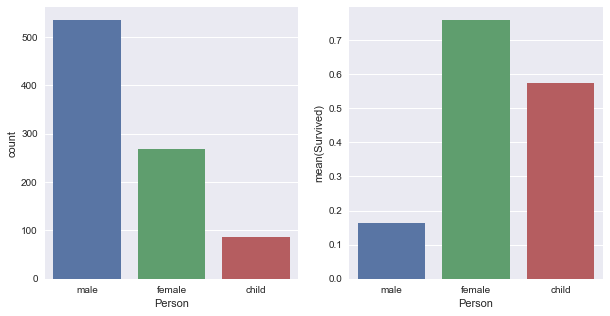

In [28]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))

sns.countplot('Person',data=titanic_df,ax=axis1)

person_perc=titanic_df[['Person','Survived']].groupby(['Person'],as_index=False).mean()
sns.barplot('Person','Survived',data=person_perc,order=['male','female','child'],ax=axis2)

plt.show()

In [29]:
person_dummies_titanic=pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.drop(['male'],axis=1,inplace=True) #因为Male中Survived的概率很低

person_dummies_titanic.head()

,child,female
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0


In [30]:
person_dummies_test=pd.get_dummies(test_df['Person'])
person_dummies_test.drop(['male'],axis=1,inplace=True)

person_dummies_test.head()

,child,female
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [31]:
titanic_df=titanic_df.join(person_dummies_titanic)
test_df=test_df.join(person_dummies_test)

titanic_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Person,child,female
0,0,3,22,7,0,0,1,male,0,0
1,1,1,38,71,1,0,1,female,0,1
2,1,3,26,7,0,0,0,female,0,1
3,1,1,35,53,0,0,1,female,0,1
4,0,3,35,8,0,0,0,male,0,0


In [32]:
# 删除 Person
titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

titanic_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,child,female
0,0,3,22,7,0,0,1,0,0
1,1,1,38,71,1,0,1,0,1
2,1,3,26,7,0,0,0,0,1
3,1,1,35,53,0,0,1,0,1
4,0,3,35,8,0,0,0,0,0


## Pclass

将 Pclass get_dummies，再删除 Survived 概率小的列。

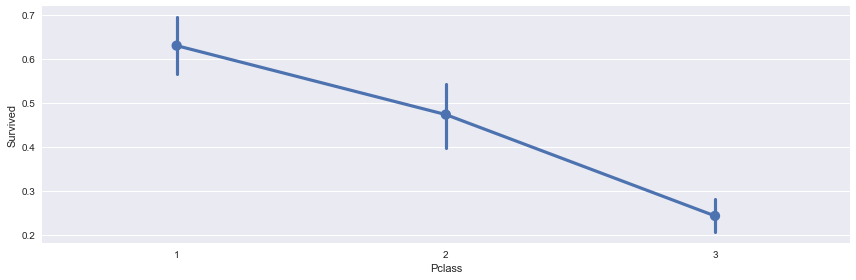

In [33]:
sns.factorplot('Pclass','Survived',order=[1,2,3],data=titanic_df,size=4,aspect=3)
plt.show()

In [34]:
pclass_dummies_titanic=pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [35]:
pclass_dummies_titanic.columns=['Class_1','Class_2','Class_3'] #改名
pclass_dummies_titanic.drop(['Class_3'],axis=1,inplace=True)
pclass_dummies_titanic.head()

,Class_1,Class_2
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [36]:
pclass_dummies_test=pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns=['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'],axis=1,inplace=True)

pclass_dummies_test.head()

,Class_1,Class_2
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [37]:
titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df=titanic_df.join(pclass_dummies_titanic)
test_df=test_df.join(pclass_dummies_test)

titanic_df.head()

,Survived,Age,Fare,C,Q,Family,child,female,Class_1,Class_2
0,0,22,7,0,0,1,0,0,0,0
1,1,38,71,1,0,1,0,1,1,0
2,1,26,7,0,0,0,0,1,0,0
3,1,35,53,0,0,1,0,1,1,0
4,0,35,8,0,0,0,0,0,0,0


# 预测

In [38]:
X_train=titanic_df.drop(['Survived'],axis=1)
y_train=titanic_df['Survived']

X_test=test_df.drop('PassengerId',axis=1)
test_df.head()

,PassengerId,Age,Fare,C,Q,Family,child,female,Class_1,Class_2
0,892,34,7,0,1,0,0,0,0,0
1,893,47,7,0,0,1,0,1,0,0
2,894,62,9,0,1,0,0,0,0,1
3,895,27,8,0,0,0,0,0,0,0
4,896,22,12,0,0,1,0,1,0,0


In [39]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred1=logreg.predict(X_test)
logreg.score(X_train,y_train)

0.8058361391694725

In [40]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred2=svc.predict(X_test)
svc.score(X_train,y_train)

0.85858585858585856

In [41]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
y_pred3=random_forest.predict(X_test)
random_forest.score(X_train,y_train)

0.96857463524130194

In [42]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred4=knn.predict(X_test)
knn.score(X_train,y_train)

0.8271604938271605

In [43]:
gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
y_pred5=gaussian.predict(X_test)
gaussian.score(X_train,y_train)

0.76430976430976427

In [44]:
gbdt=GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
y_pred6=gbdt.predict(X_test)
gbdt.score(X_train,y_train)

0.87991021324354657

In [45]:
titanic_df.columns

Index([u'Survived', u'Age', u'Fare', u'C', u'Q', u'Family', u'child',
       u'female', u'Class_1', u'Class_2'],
      dtype='object')

In [46]:
titanic_df.columns.delete(0) #删除Survived

Index([u'Age', u'Fare', u'C', u'Q', u'Family', u'child', u'female', u'Class_1',
       u'Class_2'],
      dtype='object')

In [47]:
coeff_df=pd.DataFrame({'Features':titanic_df.columns.delete(0)})
coeff_df

,Features
0,Age
1,Fare
2,C
3,Q
4,Family
5,child
6,female
7,Class_1
8,Class_2


In [48]:
coeff_df['Coefficient Estimate']=pd.Series(logreg.coef_[0])
coeff_df

,Features,Coefficient Estimate
0,Age,-0.023928
1,Fare,0.001032
2,C,0.589515
3,Q,0.283963
4,Family,-0.229396
5,child,1.749158
6,female,2.745276
7,Class_1,2.005227
8,Class_2,1.118387


In [49]:
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred1
})
submission.to_csv('submission_3_1_logreg.csv',index=False)

In [50]:
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred2
})
submission.to_csv('submission_3_2_svc.csv',index=False)

In [51]:
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred3
})
submission.to_csv('submission_3_3_rdforest.csv',index=False)

In [52]:
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred4
})
submission.to_csv('submission_3_4_knn.csv',index=False)

In [53]:
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred5
})
submission.to_csv('submission_3_5_gaussian.csv',index=False)

In [54]:
submission=pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred6
})
submission.to_csv('submission_3_6_gbdt.csv',index=False)

# 提交后得分
- LogisticRegression：0.76077
- SVC：0.61722
- RandomForestClassifier：0.73206
- KNeighborsClassifier：0.62201
- GaussianNB：0.73206
- GradientBoostingClassifier：0.77033